# Policy and Value Iteration

In [1]:
import numpy as np
import math
import random

f = open('prob_a1.txt','r')
p_a1 = f.read().splitlines()
f = open('prob_a2.txt','r')
p_a2 = f.read().splitlines()
f = open('prob_a3.txt','r')
p_a3 = f.read().splitlines()
f = open('prob_a4.txt','r')
p_a4 = f.read().splitlines()
f = open('rewards.txt','r')
rewards = f.read().splitlines()
rewards = [int(i) for i in rewards]
rewards = np.array([rewards]).T

In [2]:
p_a1_array = np.zeros((81,81))
p_a2_array = np.zeros((81,81))
p_a3_array = np.zeros((81,81))
p_a4_array = np.zeros((81,81))

In [3]:
data_list = [p_a1,p_a2,p_a3,p_a4]
array_list = [p_a1_array,p_a2_array,p_a3_array,p_a4_array]

# rows are for s
# columns are for s'
for j in range(4):
    for i in range(len(data_list[j])):
        row = int(data_list[j][i].split(' ')[0]) # rows are the s
        col = int(data_list[j][i].split(' ')[2]) # columns are the s' values
        prob = float(data_list[j][i].split(' ')[4]) # probability
        array_list[j][row-1,col-1] = prob

In [4]:
gamma = .9925
policy = np.random.randint(low = 0,high =4,size = 81)
policy.shape

(81,)

In [5]:
def V(policy,array,rewards):
    # built up the matrix
    I_pi_mat = np.identity((81))
    for j in range(81): # iterate over our rows -> the s values
        for i in range(81): # iterate over the columns -> the s' values
             I_pi_mat[j,i] -= gamma*array[policy[j]][j,i]
    
    # solve for V
    V_out = np.linalg.solve(I_pi_mat,rewards)
    return V_out,I_pi_mat
    

In [6]:
def greedy(policy,array,V):
    
    # build up our action response matrices
    Q_S_A = np.zeros((4,81))
    for k in range(4):
        for j in range(81): # iterate over our rows -> the s values
            Q_S_A[k,j] = array[k][j,:]@V[:]
    
    # find the max values for each dimension
    pi_new = np.zeros((81,1)).astype(int)
    for i in range(81):
        max_loc = np.where(Q_S_A[:,i]==np.max(Q_S_A[:,i]))[0]
#         if len(max_loc>1):
#             pi_new[i] = random.choice(max_loc) # select a random entry from the possible choices of max
#         else:
        pi_new[i] = max_loc[0]
    
    return pi_new.flatten(),Q_S_A
        

In [7]:
#### ITERATIVE POLICY UPDATE ROUTINE ####

#initialize values
rewards = rewards
prob_array_list = array_list
gamma = gamma
gamma = .9925
policy = np.random.randint(low = 0,high =4,size = 81)
old_policy = policy
V_init,_ = V(old_policy,prob_array_list,rewards)
V_old = V_init
converged = False
num_iter = 100
i = 0

# start the iteration routine
while converged == False and  i < num_iter:
    print('iteration: ',i)
    # update our greedy policy
    new_policy,Q = greedy(old_policy,prob_array_list,V_old)
    
#     if i == 0:
#         print(Q)
    
    
    # update our return function
    V_new,_ = V(new_policy,prob_array_list,rewards)
    
        #print(V_new)
    
    
    # check to see if we converged
    conv_check = np.equal(new_policy,old_policy)
    
    
    if np.count_nonzero(conv_check) == 81:
        print('converged')
        converged = True
    
    #sanity check that we are always improving
    for j in range(81):
        if(V_old[j]>V_new[j]):
            if np.isclose(V_old[j],V_new[j]) == False:
                print('wTF')
                break
    
    # if we didn't converge make the new values the old values and increment
    i+= 1
    V_old = V_new
    old_policy = new_policy

iteration:  0
iteration:  1
iteration:  2
iteration:  3
converged


In [8]:
V_new[:20]

array([[  0.        ],
       [  0.        ],
       [100.70098073],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [102.3752644 ],
       [101.52364515],
       [  0.        ],
       [  0.        ],
       [109.48993454],
       [110.40903296],
       [111.33584663],
       [  0.        ],
       [  0.        ],
       [103.23462342]])

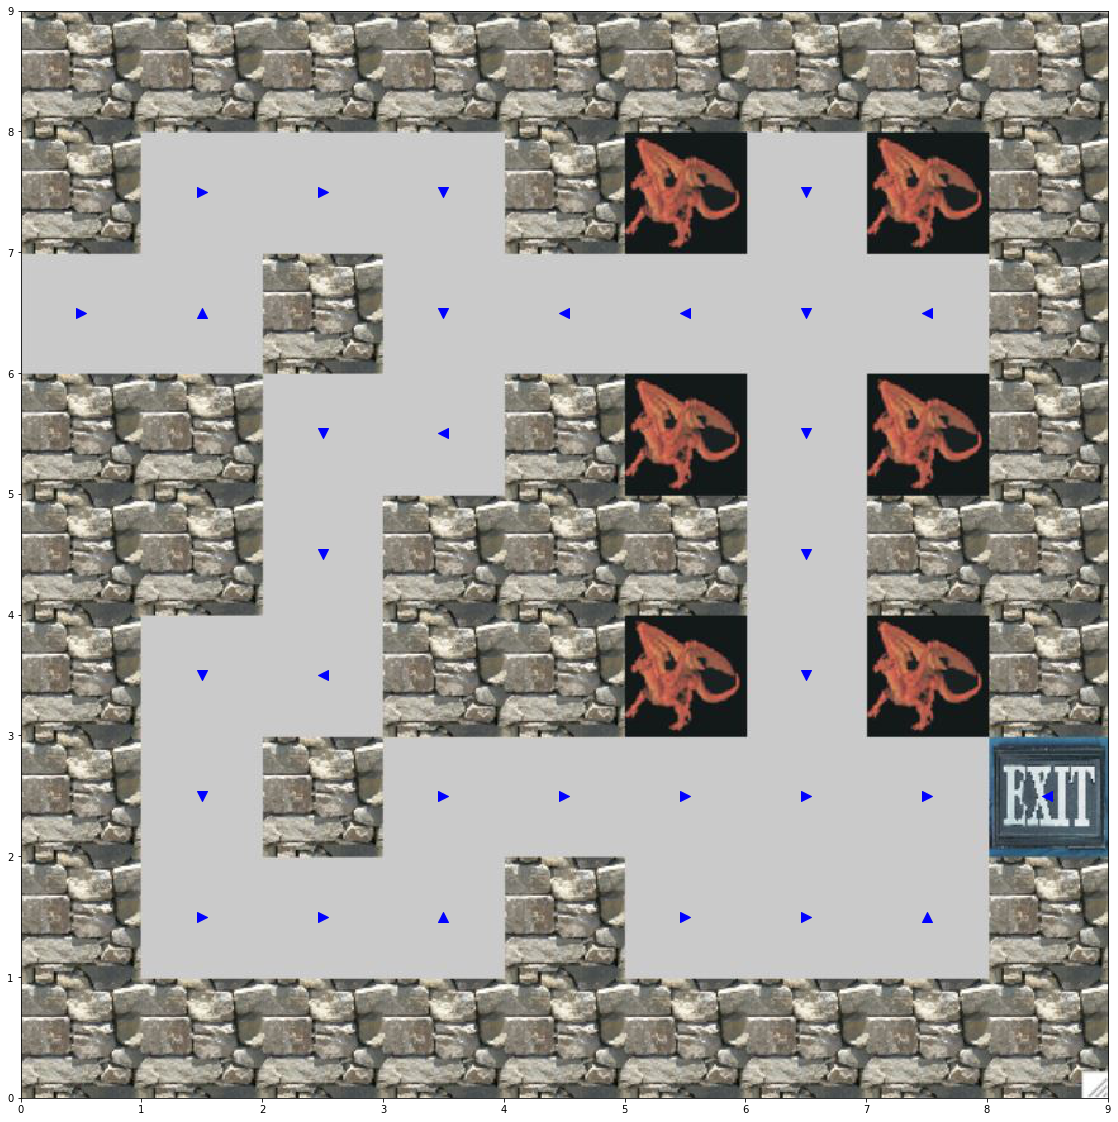

In [10]:
import matplotlib.pyplot as plt
img = plt.imread('Grid_Image.JPG')
grid_x = list(range(1,10))
grid_x = [i-.5 for i in grid_x]
grid_y = list(range(9,0,-1))
grid_y = [i-.5 for i in grid_y]
#print(grid_y)
yy,xx = np.meshgrid(grid_y,grid_x)
xx = xx.flatten()
yy = yy.flatten()
# print(xx[:20])
# print(yy[:20])

plt.figure(figsize = (20,20))
marker_list = ['<','^','>','v']
for i in range(81):
    mk = marker_list[new_policy[i]]
    if V_new[i] >.0001:
        plt.scatter(xx[i],yy[i],s = 100,marker = mk,color = 'blue' )
    
plt.xlim(0,9)
plt.ylim(0,9)
plt.imshow(img, zorder=0, extent=[0, 9, 0, 9])
plt.show()

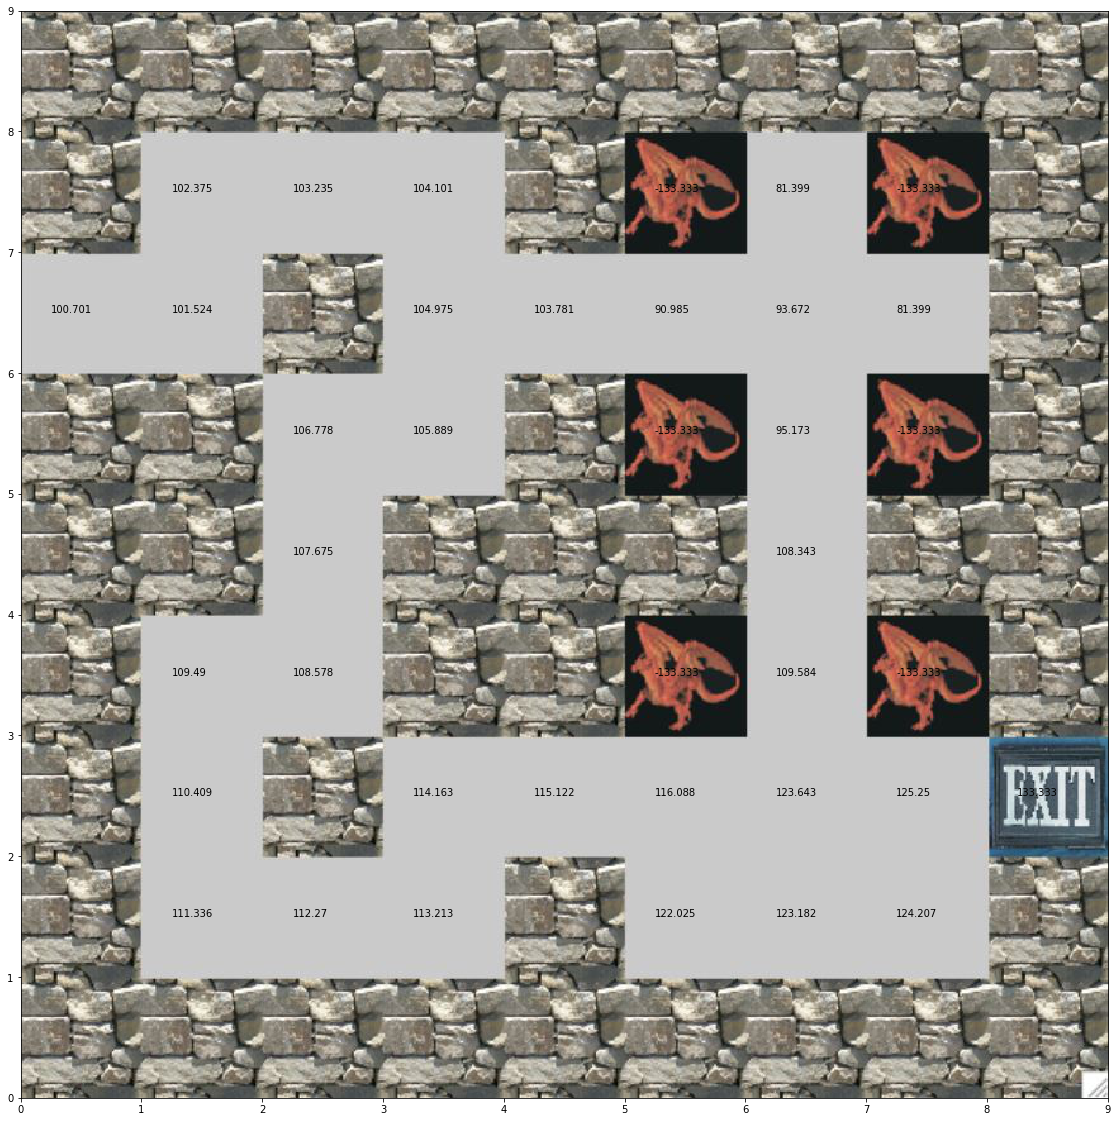

In [10]:
plt.figure(figsize = (20,20))
marker_list = ['<','^','>','v']
for i in range(81):
    if np.abs(V_new[i]) >.0001:
        string = str(np.round(V_new[i][0],3))
        #print(string)
        #plt.scatter(xx[i],yy[i])
        plt.annotate(string,(xx[i]-.25,yy[i]))
    
plt.xlim(0,9)
plt.ylim(0,9)
plt.imshow(img, zorder=0, extent=[0, 9, 0, 9])
plt.show()

In [11]:
##### VALUE ITERATION ######

In [12]:
def return_iter(V_in,rewards,array):
    
    V_out = np.zeros(V_in.shape)
    Policy_out = np.zeros(V_in.shape)
    for j in range(81):
        
        policy_score = np.zeros((4,))
        for k in range(4):
            for i in range(81):
                policy_score[k] += array[k][j,i]*V_in[i]
        
        max_loc = np.where(policy_score==np.max(policy_score))[0]
        if len(max_loc)>1:
            max_loc = max_loc[0]
        #print(policy_score,max_loc)
        V_out[j] = rewards[j] + gamma*policy_score[max_loc]
        Policy_out[j] = max_loc
    
    return V_out,Policy_out

In [18]:
#initialize values
rewards = rewards
prob_array_list = array_list
gamma = gamma
gamma = .9925
policy = np.random.randint(low = 0,high =4,size = 81)
old_policy = policy
V_old = np.zeros((81,1))
converged = False
num_iter = 1500
i = 0
V_old.shape

# start the iteration routine
while converged == False and  i < num_iter:
    
    if i%100 == 0:
        print('iteration: ',i)
    
    V_new,new_policy = return_iter(V_old,rewards,prob_array_list)
    
    # check to see if we converged
    #conv_check = np.isclose(V_new,V_old,rtol = .0000001, atol = .0001)
    
#     if np.count_nonzero(conv_check) == 81:
#         print('converged')
#         converged = True
    
#     #sanity check that we are always improving
#     for j in range(81):
#         if(V_old[j]>V_new[j]):
#             if np.isclose(V_old[j],V_new[j]) == False:
#                 print('wTF')
#                 print(V_old[j],V_new[j])
#                 break
    
    # if we didn't converge make the new values the old values and increment
    i+= 1
    V_old = V_new
    old_policy = new_policy

iteration:  0
iteration:  100
iteration:  200
iteration:  300
iteration:  400
iteration:  500
iteration:  600
iteration:  700
iteration:  800
iteration:  900
iteration:  1000
iteration:  1100
iteration:  1200
iteration:  1300
iteration:  1400


(81, 1)

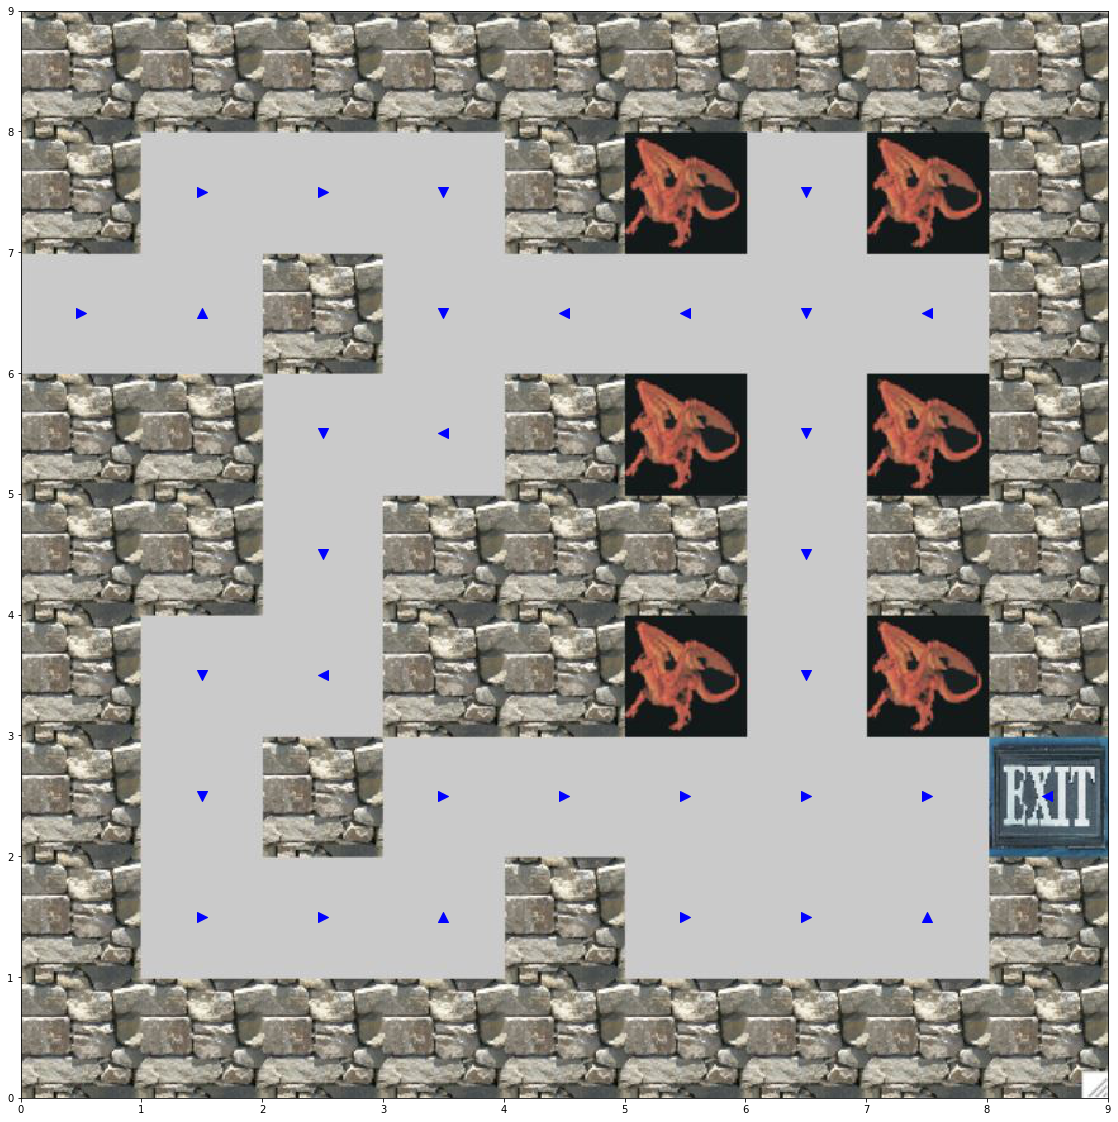

In [19]:
import matplotlib.pyplot as plt
new_policy = new_policy.flatten().astype(int)
img = plt.imread('Grid_Image.JPG')
grid_x = list(range(1,10))
grid_x = [i-.5 for i in grid_x]
grid_y = list(range(9,0,-1))
grid_y = [i-.5 for i in grid_y]
#print(grid_y)
yy,xx = np.meshgrid(grid_y,grid_x)
xx = xx.flatten()
yy = yy.flatten()
# print(xx[:20])
# print(yy[:20])

plt.figure(figsize = (20,20))
marker_list = ['<','^','>','v']
for i in range(81):
    mk = marker_list[new_policy[i]]
    if V_new[i] >.0001:
        plt.scatter(xx[i],yy[i],s = 100,marker = mk,color = 'blue' )
    
plt.xlim(0,9)
plt.ylim(0,9)
plt.imshow(img, zorder=0, extent=[0, 9, 0, 9])
plt.show()

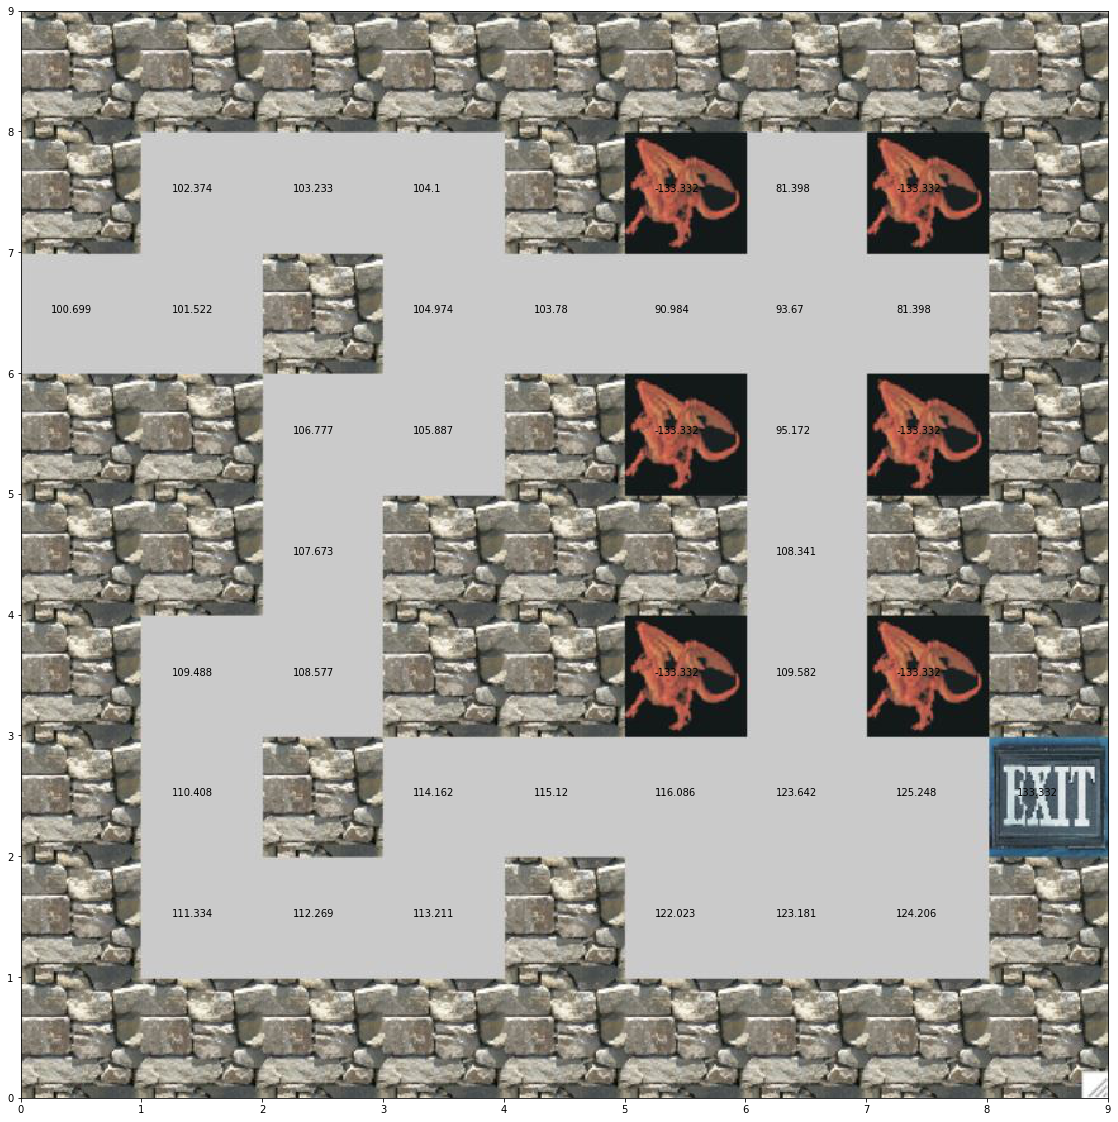

In [20]:
plt.figure(figsize = (20,20))
marker_list = ['<','^','>','v']
for i in range(81):
    if np.abs(V_new[i]) >.0001:
        string = str(np.round(V_new[i][0],3))
        #print(string)
        #plt.scatter(xx[i],yy[i])
        plt.annotate(string,(xx[i]-.25,yy[i]))
    
plt.xlim(0,9)
plt.ylim(0,9)
plt.imshow(img, zorder=0, extent=[0, 9, 0, 9])
plt.show()